In [1]:
import numpy as np
import torch 
from matplotlib import pyplot as plt
from utils import radonTransform,initial
from skimage.transform import rescale
from skimage.data import shepp_logan_phantom
from skimage.metrics import peak_signal_noise_ratio as PSNR
from skimage.metrics import structural_similarity as ssim
from MCMC.BPS_Gibbs_sparse import BPS_Gibbs
#from MCMC.GS_Horseshoe import Gibbs_sampling
from MCMC.GS_Fused_L_half import Gibbs_sampling
from MCMC.PLD_sparse import proximal_langevin
from MCMC.PCN_KL_sparse import PCN


In [2]:
pixel=64
np.random.seed(5041294)
height, width = 64,64
angleNum = 32
A = radonTransform(angleNum, pixel, pixel)
image = shepp_logan_phantom()
x_true = rescale(image, scale=height / 400, mode='reflect')

x = x_true.reshape(-1, 1)
y_noise_free = A @ x
sigma = 0.01 * np.max(y_noise_free)
y = (y_noise_free + sigma * np.random.randn(*y_noise_free.shape))
n = height * width
m = y.shape[0]


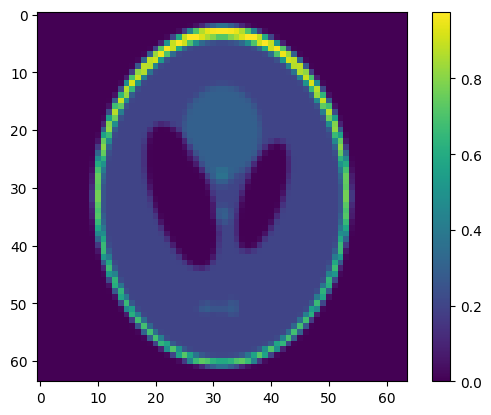

In [3]:
plt.figure()
plt.imshow(x.reshape(pixel, pixel))
plt.colorbar(plt.imshow(x.reshape(pixel, pixel)))
plt.show()

In [4]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
x_init=initial(A,y,device1)

In [6]:
hyper= [1,300,1,300]

#hyper = [1, 0.1, 1, 0.1]
#hyper = [10, 10]

#length_scale = 0.015
#nu = 2.5
#lambda_tv = 40
#beta = 0.0006

#hyper = [length_scale, nu, lambda_tv, beta]

In [7]:
#x_mean,x_std = BPS_Gibbs(x_init, torch.from_numpy(y).to(device1), torch.from_numpy(A.copy()).to(device1), sigma, hyper, gamma1=1, gamma2 = 1)
x_mean,x_std = Gibbs_sampling(x_init, torch.from_numpy(y).to(device1), torch.from_numpy(A.copy()).to(device1), sigma, hyper, gamma1=1, gamma2 = 1)
#x_mean,x_std = proximal_langevin(x_init, torch.from_numpy(y).to(device1), torch.from_numpy(A.copy()).to(device1), sigma, hyper)
#x_mean,x_std = PCN(torch.from_numpy(x).to(device1), torch.from_numpy(y).to(device1), torch.from_numpy(A.copy()).to(device1), sigma, hyper)

100%|██████████| 4999/4999 [07:27<00:00, 11.17it/s]


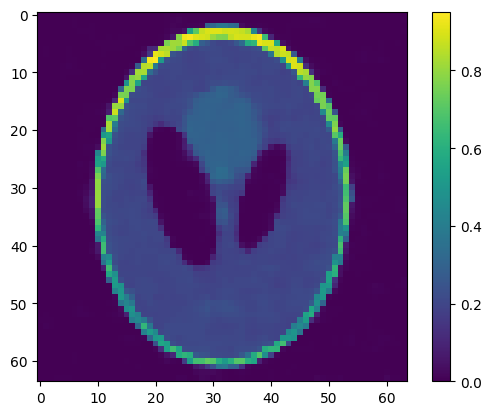

In [8]:
pixel = 64
plt.figure()
plt.imshow((x_mean.view(pixel, pixel)).cpu().numpy())
plt.colorbar(plt.imshow((x_mean.view(pixel, pixel)).cpu().numpy()))
plt.show()